Populating the interactive namespace from numpy and matplotlib


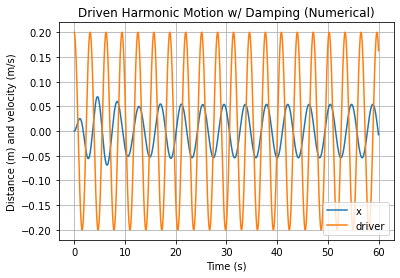

In [12]:
%pylab inline
# <Exercise 6.1 Numerical solution to SHO with damping and later driving>
# <Exercise 5.6 No damping> 
from scipy.integrate import odeint
#### Edit the code below
# <Exercise 5.1 Analytical solution, no damping>
x0 = 0
v0 = 0
k = 8
m = 2
F0 = 0.2
w0 = np.sqrt(k/m)
wdrive = 0.75*w0
beta_damp = 0.2 #the damping parameter
#tpoints = np.linspace(0,10,10000) 

def deriv(r,t,param): 
    #unpack the parameters (in this case, just the damping parameter)
    beta_damp_deriv = param[0]
    omega_deriv = param[1]
    #unpack the variables
    x = r[0]
    v = r[1]
    #perform the derivatives
    dxdt = v  #fix
    dvdt = -w0**2 * x - (2*beta_damp_deriv)*v + F0*cos(wdrive*t)/m #fix
    return array([dxdt,dvdt],float)

t = np.linspace(0.0,60,10000) #fix 
#beta_damp = 0.0 # The damping parameter. In later exercises, you will change this value
param = np.array([beta_damp,w0]) # Same the damping parameter into the param array so that it can be passed to the deriv 
rinit = np.array([x0,v0])                             # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,)) # Including the param array in the arguments we pass
                                                                # to odeint

#### CODE TO PLOT x(t) AND v(t) HERE
figure()
plot(t,r[:,0],label='x')
plot(t, F0*cos(w0*t), label='driver')
grid()
legend()
title('Driven Harmonic Motion w/ Damping (Numerical)')
xlabel('Time (s)')
ylabel('Distance (m) and velocity (m/s)')
show()
#### CODE TO SAVE SOLUTION HERE
        
#undamped_xsolution = r[:,0] #saving the undamped solution